# Eixos, Escalas e Sistemas de Coordenadas

Prof. Gustavo Oliveira

CI/DCC/UFPB

[gcpeixoto.github.com/DATAVIZ](https://gcpeixoto.github.com/DATAVIZ)

- Definir escalas de posição é imprescindível para visualizar informações, especialmente quantitativas
- Escalas de posição em conjunto com um arranjo geométrico formam um _sistema de coordenadas_
- Escalas ajudam a posicionar a informação e a criar representações visuais com _razões de aspecto_ distintas. Ex.:
    - Figuras esticadas na vertical e estreitas na horizontal enfatizam "crescimento para cima"
    - Figuras compridas na horizontal e encurtadas na vertical podem dar uma ideia de algo que se "prolonga para o lado"
- Razões de aspecto são totalmente dependentes do projeto visual

## Sistema de coordenadas cartesianas e razões de aspecto

### Série temporal aleatória

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def test_aspect_ratio(Lx,fator,tag):
    dist = np.random.normal(size=(200),loc=0.0,scale=1.0)
    fig, ax = plt.subplots(figsize=(Lx,fator*Lx))
    ax.plot(dist,lw=1.0,c='#117029')
    ax.set_xlabel('x',fontsize=8)
    ax.set_ylabel('y',fontsize=8)
    ax.set_title(f'{tag}) Lx = {Lx}; Ly = {fator*Lx}',fontsize=8)

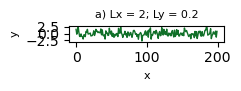

In [2]:
test_aspect_ratio( 2 , 0.1 , 'a' )

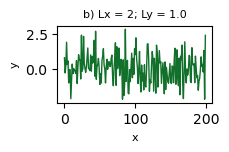

In [3]:
test_aspect_ratio( 2 , 0.5 , 'b' )

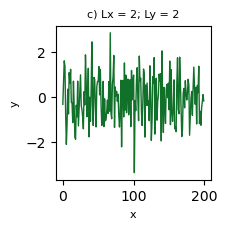

In [4]:
test_aspect_ratio( 2 , 1 , 'c' )

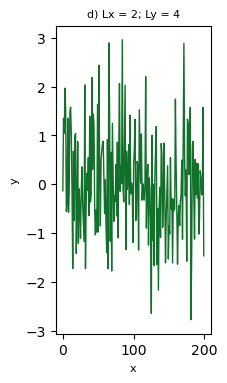

In [5]:
test_aspect_ratio( 2 , 2 , 'd' )

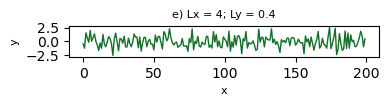

In [6]:
test_aspect_ratio( 4 , 0.1 , 'e' )

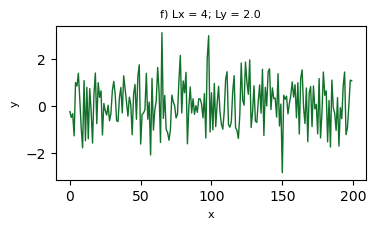

In [7]:
test_aspect_ratio( 4 , 0.5 , 'f' )

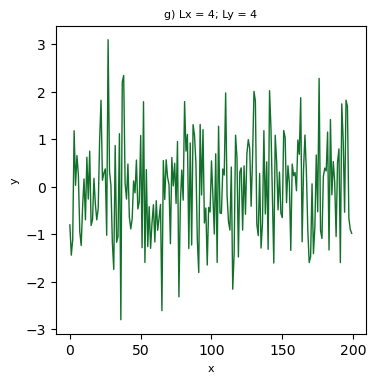

In [8]:
test_aspect_ratio( 4 , 1 , 'g' )

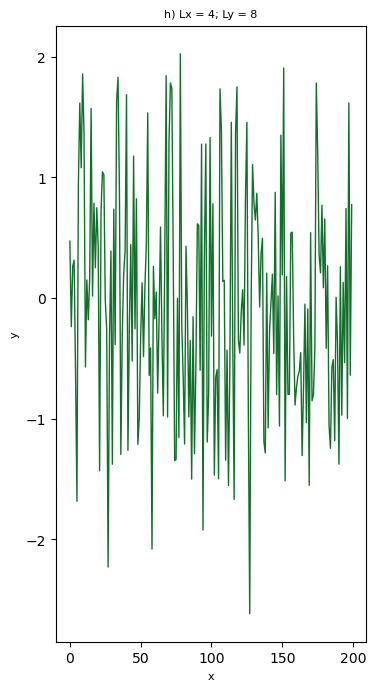

In [9]:
test_aspect_ratio( 4 , 2 , 'h' )

### Série temporal de temperatura (Aula 3)

In [10]:
import matplotlib.pyplot as plt
import h5py as h5
import pandas as pd
import numpy as np

def plot_temperature(__horiz,__vert):
    file_hdf = h5.File('../data/NEONDSTowerTemperatureData.hdf5','r')
    df_t = pd.DataFrame(np.array(file_hdf['Domain_10']['STER']['min_1']['boom_2']['temperature']))
    df_hours = df_t['date'][0::60].index
    df_ti = df_t.iloc[df_hours][:24]

    fig, ax = plt.subplots(figsize=(__horiz,__vert))
    ax.plot(df_ti['mean'],c='#be5631',lw=1.5)

    da = np.array(list((df_ti['mean'].index)))
    db = np.array([str(i) + 'h' for i in range(0,24)])
    ax.set_xticks(da,db,fontsize=5)
    ax.grid(axis='both',ls=':',c='k',alpha=0.4)
    ax.set_xlabel('Tempo',fontsize=9)
    ax.set_ylabel('Temperatura',fontsize=9)

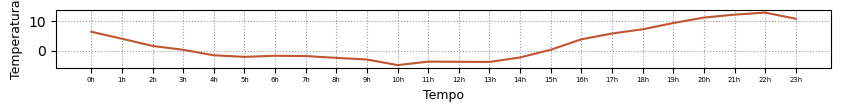

In [11]:
h = 1
plot_temperature(10*h,3/4*h)

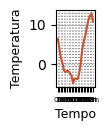

In [12]:
plot_temperature(h/2,h)

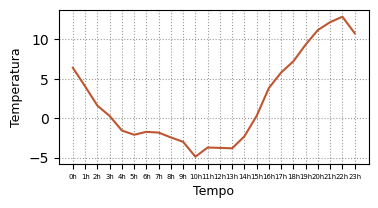

In [13]:
plot_temperature(4*h,2*h)

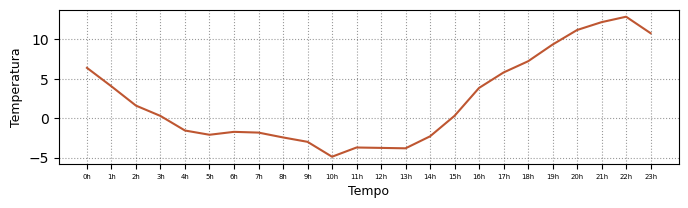

In [14]:
plot_temperature(8*h,2*h)

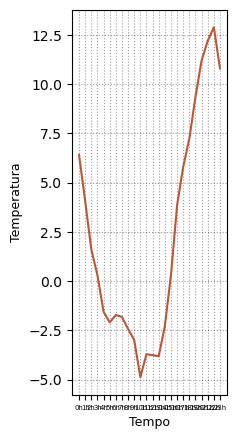

In [15]:
plot_temperature(2*h,5*h)

### Escalas
A visualização abaixo corresponde a dados reais de montantes repassados pela Petrobras ao Fundo Amazônia - BNDES entre 2012 e 2018 de acordo com o Ministério do Meio Ambiente.

In [16]:
import pandas as pd
import seaborn as sns

# dados 
f_amaz = pd.read_csv('../data/petr-repasse-redd-amazonia.csv')
f_amaz.drop(index=0,inplace=True)
f_amaz

,ano,repasse
1,2012,324160.00
2,2013,495328.65
3,2014,601357.20
4,2015,880310.00
5,2016,276642.00
6,2017,578063.10
7,2018,347037.35


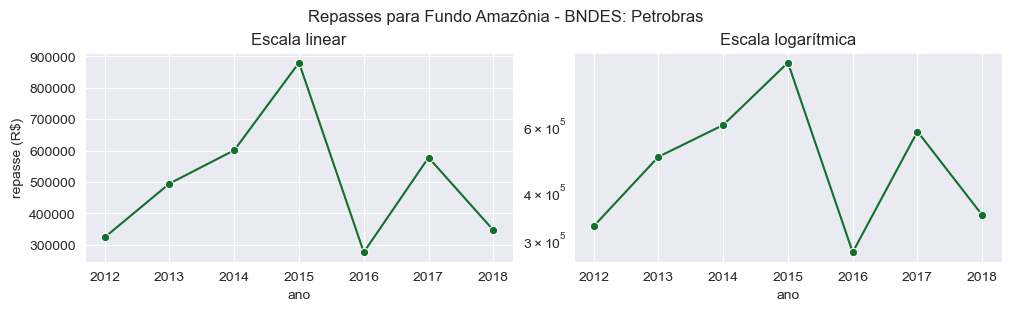

In [17]:
# visualização
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,3),constrained_layout=True)
fig.suptitle('Repasses para Fundo Amazônia - BNDES: Petrobras')

f = sns.lineplot(x='ano',y='repasse',data=f_amaz, marker='o',c='#117029',ax=ax[0])
f.set_title('Escala linear');
f.set_ylabel('repasse (R$)');

f = sns.lineplot(x='ano',y='repasse',data=f_amaz, marker='o',c='#117029',ax=ax[1])
f.set(yscale='log') # 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'
f.set_title('Escala logarítmica');
f.set_ylabel('');


- Primeiro caso, a escala do eixo _y_ é linear; no segundo, é _logarítmica_, isto é, não linear. 

- Há situações em que escalas não lineares para os eixos mostram-se mais adequadas do que escalas não lineares.

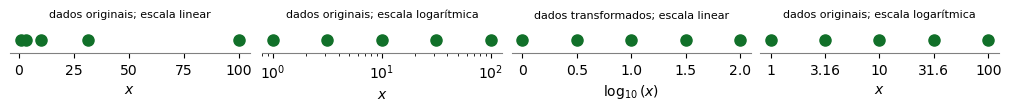

In [18]:
import aux04a

## Sistema de coordenadas polares

- Funções matemáticas

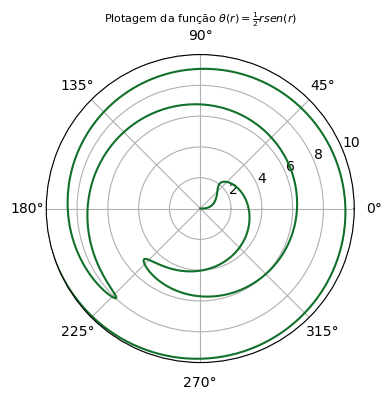

In [19]:
r = np.arange(0, 300, 0.01)
theta = 0.5*r*np.sin(r)

# configuração do eixo
fig, ax = plt.subplots(figsize=(4,4),subplot_kw={'projection': 'polar'})
ax.plot(theta, r,c='#117029')
ax.set_rmax(10)
ax.set_title('Plotagem da função $\\theta(r) = \\frac{1}{2}r sen(r)$', va='center',fontsize=8);

- Rosáceas

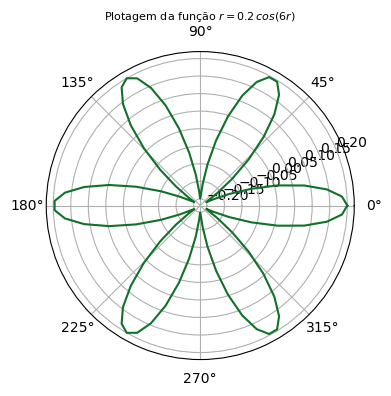

In [20]:
theta = np.linspace(0, 2*np.pi,100)
magnitude, petals = 0.2, 6
r = magnitude*np.cos(petals*theta)

# configuração do eixo
fig, ax = plt.subplots(figsize=(4,4),subplot_kw={'projection': 'polar'})
ax.plot(theta, r,c='#117029')
ax.set_title(f'Plotagem da função $r = {magnitude:0.1f} \\, cos({petals:d}r)$', va='center',fontsize=8);

- Segmentos

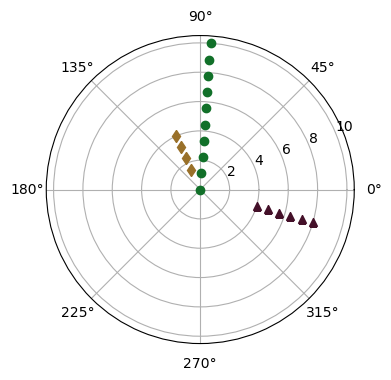

In [21]:
r1 = np.linspace(0,10,10)
theta1 = r1*0 + 1.5

r2 = np.linspace(1.5,4,4)
theta2 = r2*0 + 2

r3 = np.linspace(4,8,6)
theta3 = r3*0 + 6

fig, ax = plt.subplots(figsize=(4,4),subplot_kw={'projection': 'polar'})
ax.plot(theta1, r1, 'o', c='#117029')
ax.plot(theta2, r2, 'd', c='#997029')
ax.plot(theta3, r3, '^', c='#441029');

### Simulação de teste de balística

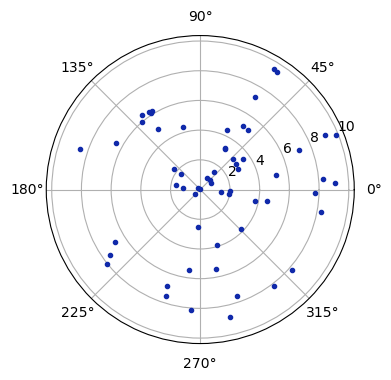

In [22]:
np.random.seed(10)
r4 = 10*np.random.rand(1,60)
theta4 = r4 - 10.4*np.cos(r4)

fig, ax = plt.subplots(figsize=(4,4),subplot_kw={'projection': 'polar'})
ax.plot(theta4, r4, '.', c='#1029aa');

## Sistemas de coordenadas geoespaciais

Sistemas geoespaciais são úteis para plotagem de dados cartográficos, mapas e geolocalizações.

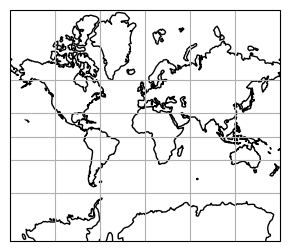

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(3.5, 3))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
ax.gridlines();

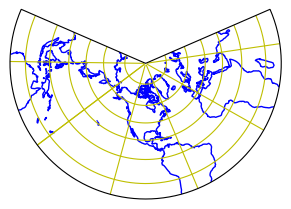

In [24]:
plt.figure(figsize=(3.5, 3))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.coastlines(color='b')
ax.gridlines(color='y');

Text(-13.135034107925277, 40.775693950446474, 'LIS')

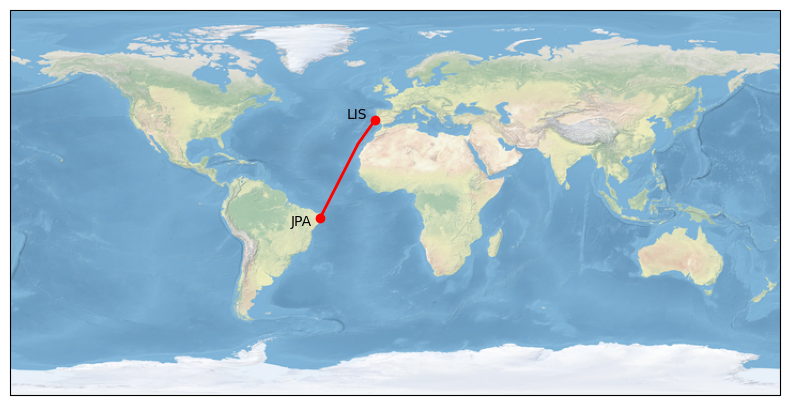

In [25]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img();

jpa_lon, jpa_lat = -34.94875494445774, -7.1456365022219215
lis_lon, lis_lat = -9.135034107925277, 38.775693950446474
plt.plot([jpa_lon, lis_lon], [jpa_lat, lis_lat],
         color='red', linewidth=2, marker='o',
         transform=ccrs.Geodetic());


plt.text(jpa_lon-4, jpa_lat-2,'JPA',fontsize=10,ha='right',va='center',transform=ccrs.Geodetic())
plt.text(lis_lon-4, lis_lat+2,'LIS',fontsize=10,ha='right',va='center',transform=ccrs.Geodetic())


## Visualizações 3D

- Visualizações 2D preferíveis a 3D devido à carga cognitiva exigida para interpretação
- Entretanto, nem sempre é possível atingir RVs satisfatórias em 2D
    - Ex.: Superfície descrita como $z = f(x,y)$ em que $z$ é uma elevação de terreno
- Eixos 3D são particularmente excelentes quando se quer interagir ou manipular o visual

### Visualização de funções matemáticas

O exemplo abaixo mostra como plotar a função dada por
$$f(x,y) = 4e^{ - \
     \left[ \left( x -  \frac{a+b}{2} \right)^2  + \
             \left( y -  \frac{c+d}{2} \right)^2 \right] },$$

para o domínio bidimensional $[a,b] \times [c,d]$.

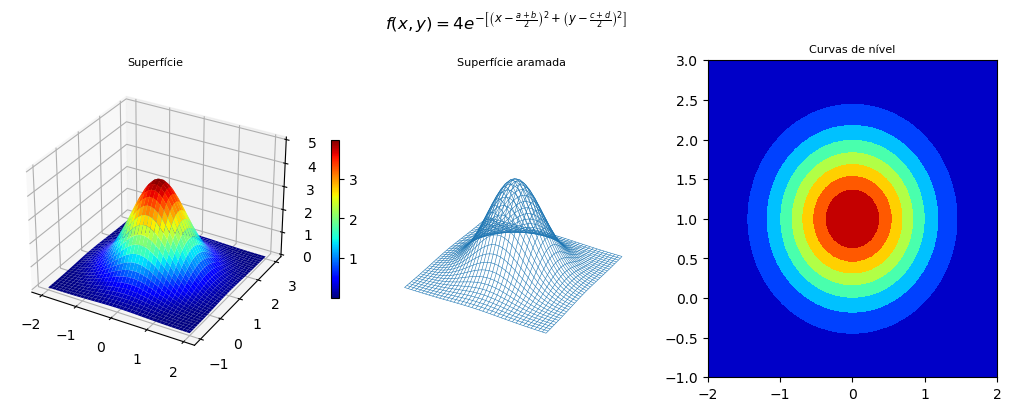

In [26]:
import aux04a2

### Visualização de dados multidimensionais categóricos

A representação visual abaixo lida com os preços de combustíveis aplicados em diversos municípios da Paraíba por diferentes operadoras (bandeiras).

In [1]:
import plotly.express as px
from plotly.offline import plot
import numpy as np
import pandas as pd

df = pd.read_csv('../data/preco-combs-pb-2022-02.csv')
fig = px.scatter_3d(df, 
                    x='Produto', 
                    y='Municipio', 
                    z='Bandeira', 
                    size='Valor de Venda', 
                    color='Valor de Venda',
                    hover_data=['Valor de Venda'])
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),
                  font=dict(size=10))
plot(fig, show_link=False,filename='exemplo-vis-3d.html');

ModuleNotFoundError: No module named 'plotly'